In [5]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [6]:
# Set the working directory and verify it
os.chdir('E:\\JESIN\\DOCUMENTS\\scma\\A1\\A1a')
print(os.getcwd())

# Reading the file into Python
data = pd.read_csv("NSSO68.csv")

E:\JESIN\DOCUMENTS\scma\A1\A1a


C:\Users\user\AppData\Local\Temp\ipykernel_2084\825106376.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [7]:
# a) Plotting a histogram and a barplot of the data to indicate the consumption district-wise for Uttar Pradesh

# Filtering for UP
df = data[data['state_1'] == "UP"]

# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
29288  29289  47099999999999997249243634991104.0             1       47100   
29289  29290  47099999999999997249243634991104.0             1       47100   
29290  29291  47099999999999997249243634991104.0             1       47100   
29291  29292  47099999999999997249243634991104.0             1       47100   
29292  29293  47099999999999997249243634991104.0             1       47100   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
29288     68               10       1       2      9            93  ...   
29289     68    

In [8]:
# Sub-setting the data
upnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Check for missing values in the subset
print("Missing Values in Subset:")
print(upnew.isnull().sum())

# Impute missing values with mean for specific columns
upnew['Meals_At_Home'].fillna(upnew['Meals_At_Home'].mean(), inplace=True)

# Check for missing values after imputation
print("Missing Values After Imputation:")
print(upnew.isnull().sum())

Missing Values in Subset:
state_1                 0
District                0
Region                  0
Sector                  0
State_Region            0
Meals_At_Home          60
ricepds_v               0
Wheatpds_q              0
chicken_q               0
pulsep_q                0
wheatos_q               0
No_of_Meals_per_day     0
dtype: int64
Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2084\741560774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upnew['Meals_At_Home'].fillna(upnew['Meals_At_Home'].mean(), inplace=True)


In [9]:
# Function to remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

In [10]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    upnew = remove_outliers(upnew, col)

In [11]:
# Summarize consumption
upnew['total_consumption'] = upnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top and bottom consuming districts and regions
district_summary = upnew.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
region_summary = upnew.groupby('Region')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)

print("Top 3 Consuming Districts:")
print(district_summary.head(3))
print("Bottom 3 Consuming Districts:")
print(district_summary.tail(3))

print("Region Consumption Summary:")
print(region_summary)

Top 3 Consuming Districts:
    District  total_consumption
14        15        1323.015188
10        11        1228.852129
11        12        1124.361810
Bottom 3 Consuming Districts:
    District  total_consumption
40        41         289.548810
47        48         221.714015
55        56         190.502381
Region Consumption Summary:
   Region  total_consumption
4       5       13449.489887
2       3       12949.177897
0       1        7396.093142
1       2        6494.791811
3       4        3667.097532


In [26]:
# Rename districts and sectors
district_mapping = {"15": "Agra", "11": "Bulandshahar", "12": "Aligarh"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

upnew['District'] = upnew['District'].astype(str).map(district_mapping).fillna(upnew['District'])
upnew['Sector'] = upnew['Sector'].astype(str).map(sector_mapping).fillna(upnew['Sector'])
print(upnew)

      state_1 District  Region Sector  State_Region  Meals_At_Home  ricepds_v  \
29288      UP       58       3  URBAN            93           60.0        0.0   
29289      UP       58       3  URBAN            93           60.0        0.0   
29291      UP       58       3  URBAN            93           60.0        0.0   
29294      UP       58       3  URBAN            93           60.0        0.0   
29297      UP       49       3  URBAN            93           60.0        0.0   
...       ...      ...     ...    ...           ...            ...        ...   
94150      UP       45       3  RURAL            93           60.0        0.0   
94152      UP       45       3  RURAL            93           60.0        0.0   
94153      UP       45       3  RURAL            93           60.0        0.0   
94156      UP       70       3  RURAL            93           60.0        0.0   
94157      UP       70       3  RURAL            93           60.0        0.0   

       Wheatpds_q  chicken_

In [27]:
# up_consumption stores the aggregate of the consumption district-wise
up_consumption = upnew.groupby('District')['total_consumption'].sum().reset_index()
print(up_consumption)

        District  total_consumption
0              1         800.083145
1              2        1061.463651
2              3         808.415093
3              4        1009.743272
4              5         353.268452
..           ...                ...
66            70         306.074747
67            71         440.595996
68          Agra        1323.015188
69       Aligarh        1124.361810
70  Bulandshahar        1228.852129

[71 rows x 2 columns]


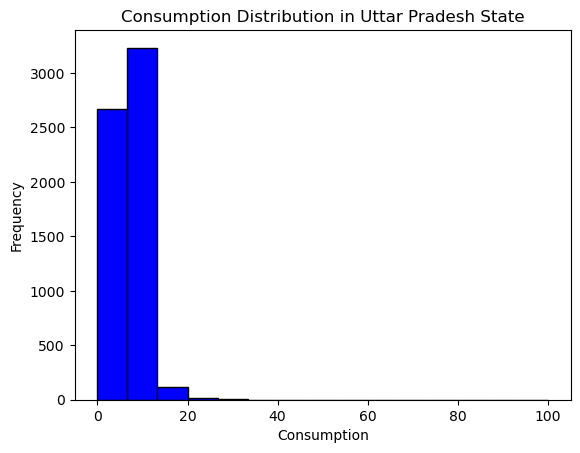

In [31]:
# Histogram to show the distribution of total consumption across different districts
plt.hist(upnew['total_consumption'], bins=15, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Uttar Pradesh State')
plt.show()

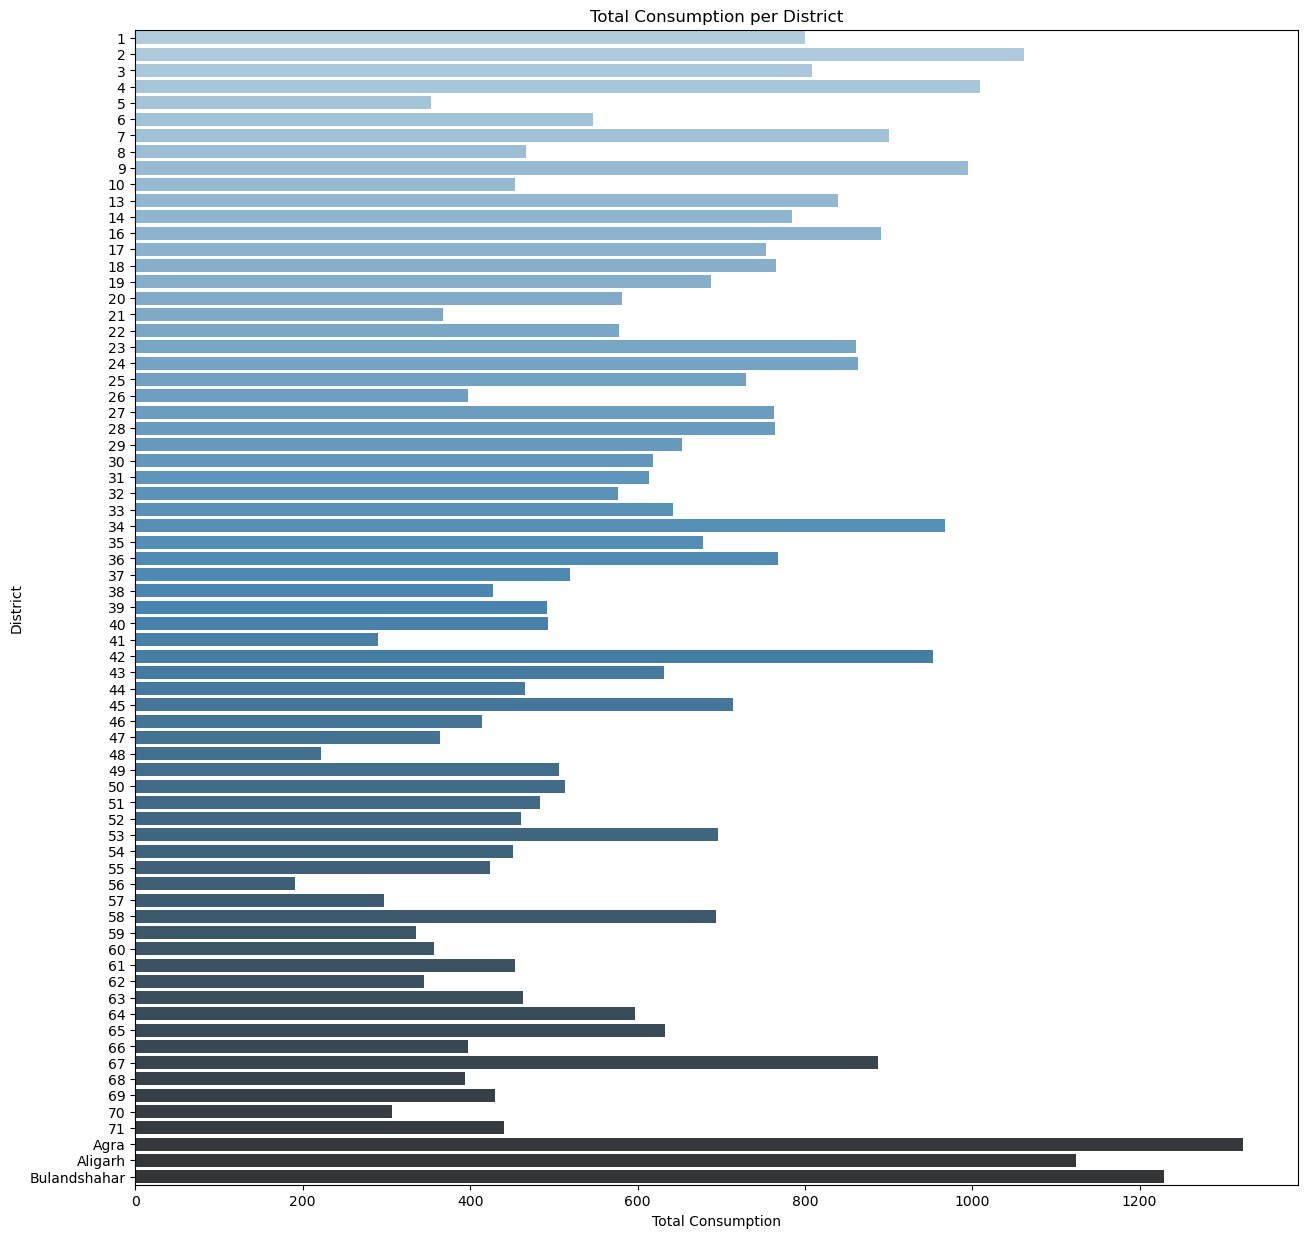

In [33]:
# Barplot to visualize consumption per district with district names
plt.figure(figsize=(15, 15))
sns.barplot(x='total_consumption', y='District', data=up_consumption, palette='Blues_d')
plt.xlabel('Total Consumption')
plt.ylabel('District')
plt.title('Total Consumption per District')
plt.show()

In [16]:
# b) Plotting total consumption on the Karnataka state map

# Filtering for Karnataka
df_ka = data[data['state_1'] == "KA"]

# Sub-setting the data
ka_new = df_ka[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]


In [17]:
# Check for missing values in the subset
print("Missing Values in Subset:")
print(ka_new.isnull().sum())

# Impute missing values with mean for specific columns
ka_new['Meals_At_Home'].fillna(ka_new['Meals_At_Home'].mean(), inplace=True)

# Check for missing values after imputation
print("Missing Values After Imputation:")
print(ka_new.isnull().sum())

Missing Values in Subset:
state_1                 0
District                0
Region                  0
Sector                  0
State_Region            0
Meals_At_Home          59
ricepds_v               0
Wheatpds_q              0
chicken_q               0
pulsep_q                0
wheatos_q               0
No_of_Meals_per_day     0
dtype: int64
Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2084\4012509499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ka_new['Meals_At_Home'].fillna(ka_new['Meals_At_Home'].mean(), inplace=True)


In [18]:
# Remove outliers
for col in outlier_columns:
    ka_new = remove_outliers(ka_new, col)

In [19]:
# Summarize consumption
ka_new['total_consumption'] = ka_new[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

district_summary = ka_new.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
print("District Consumption Summary:")
print(district_summary)


District Consumption Summary:
    District  total_consumption
19        20        2281.357870
0          1        2174.372053
25        26        1479.373753
17        18        1441.823070
3          4        1332.916755
11        12        1302.404203
13        14        1214.228730
9         10        1198.843083
2          3        1074.834615
14        15        1059.634816
21        22        1053.904167
22        23        1015.792560
16        17         992.455833
1          2         923.939246
8          9         901.403968
12        13         827.296829
10        11         812.777516
18        19         792.061729
28        29         781.763333
26        27         777.135595
27        28         736.295310
15        16         709.974567
4          5         657.904545
23        24         641.593523
5          6         641.353694
6          7         595.833730
7          8         468.564448
20        21         465.970635
24        25         440.578030


In [34]:
# Mapping districts so that merging of the tables will be easier
district_mapping = {
    "1": "Belagavi", "2": "Bagalkote", "3": "Vijayapura", "4": "Kalaburagi", "5": "Bidar",
    "6": "Raichur", "7": "Koppal", "8": "Gadag", "9": "Dharwad", "10": "Uttara Kannada",
    "11": "Haveri", "12": "Ballari", "13": "Chitradurga", "14": "Davanagere", "15": "Shivamogga",
    "16": "Udupi", "17": "Chikkamagaluru", "18": "Tumakuru", "19": "Kolar", "20": "Bangalore",
    "21": "Bengaluru Rural", "22": "Mandya", "23": "Hassan", "24": "Dakshina Kannada", 
    "25": "Kodagu", "26": "Mysuru", "27": "Chamarajanagara", "28": "Ramanagara", "29": "Chikkaballapura"
}

ka_new['District'] = ka_new['District'].astype(str).map(district_mapping).fillna(ka_new['District'])
print(ka_new)

      state_1    District  Region  Sector  State_Region  Meals_At_Home  \
23109      KA  Davanagere       4       2           294           54.0   
23110      KA  Davanagere       4       2           294           30.0   
23111      KA  Davanagere       4       2           294           60.0   
23112      KA  Davanagere       4       2           294           60.0   
23113      KA  Davanagere       4       2           294           58.0   
...       ...         ...     ...     ...           ...            ...   
64086      KA  Vijayapura       4       1           294           90.0   
64087      KA  Vijayapura       4       1           294           90.0   
64088      KA  Vijayapura       4       1           294           90.0   
64089      KA  Vijayapura       4       1           294           90.0   
64090      KA  Vijayapura       4       1           294           90.0   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
23109       12.0    0.714286   0.071429  0.0000

In [35]:
# ka_consumption stores aggregate of total consumption district-wise
ka_consumption = ka_new.groupby('District')['total_consumption'].sum().reset_index()
print(ka_consumption)

            District  total_consumption
0          Bagalkote         923.939246
1            Ballari        1302.404203
2          Bangalore        2281.357870
3           Belagavi        2174.372053
4    Bengaluru Rural         465.970635
5              Bidar         657.904545
6    Chamarajanagara         777.135595
7    Chikkaballapura         781.763333
8     Chikkamagaluru         992.455833
9        Chitradurga         827.296829
10  Dakshina Kannada         641.593523
11        Davanagere        1214.228730
12           Dharwad         901.403968
13             Gadag         468.564448
14            Hassan        1015.792560
15            Haveri         812.777516
16        Kalaburagi        1332.916755
17            Kodagu         440.578030
18             Kolar         792.061729
19            Koppal         595.833730
20            Mandya        1053.904167
21            Mysuru        1479.373753
22           Raichur         641.353694
23        Ramanagara         736.295310


In [36]:
# Load and plot Karnataka state map
data_map = gpd.read_file("E:\\JESIN\\DOCUMENTS\\scma\\A5\\KARNATAKA_DISTRICTS.geojson")

data_map = data_map.rename(columns={'dtname': 'District'})
print(data_map)

            District     stname stcode11 dtcode11 year_stat  Shape_Length  \
0              Bidar  KARNATAKA       29      558    2011_c  5.763814e+05   
1         Kalaburagi  KARNATAKA       29      579    2011_c  9.402528e+05   
2           Belagavi  KARNATAKA       29      555    2011_c  1.141905e+06   
3             Yadgir  KARNATAKA       29      580    2011_c  5.757503e+05   
4          Bagalkote  KARNATAKA       29      556    2011_c  6.962757e+05   
5            Raichur  KARNATAKA       29      559    2011_c  5.702024e+05   
6             Koppal  KARNATAKA       29      560    2011_c  5.642314e+05   
7              Gadag  KARNATAKA       29      561    2011_c  5.878944e+05   
8            Ballari  KARNATAKA       29      565    2011_c  8.165962e+05   
9            Dharwad  KARNATAKA       29      562    2011_c  4.889970e+05   
10    Uttara Kannada  KARNATAKA       29      563    2011_c  8.070482e+05   
11            Haveri  KARNATAKA       29      564    2011_c  4.879748e+05   

In [23]:
# Merging ka_consumption and data_map tables
data_map_data = data_map.merge(ka_consumption, on='District')
print(data_map_data)

            District     stname stcode11 dtcode11 year_stat  Shape_Length  \
0              Bidar  KARNATAKA       29      558    2011_c  5.763814e+05   
1         Kalaburagi  KARNATAKA       29      579    2011_c  9.402528e+05   
2           Belagavi  KARNATAKA       29      555    2011_c  1.141905e+06   
3          Bagalkote  KARNATAKA       29      556    2011_c  6.962757e+05   
4            Raichur  KARNATAKA       29      559    2011_c  5.702024e+05   
5             Koppal  KARNATAKA       29      560    2011_c  5.642314e+05   
6              Gadag  KARNATAKA       29      561    2011_c  5.878944e+05   
7            Ballari  KARNATAKA       29      565    2011_c  8.165962e+05   
8            Dharwad  KARNATAKA       29      562    2011_c  4.889970e+05   
9     Uttara Kannada  KARNATAKA       29      563    2011_c  8.070482e+05   
10            Haveri  KARNATAKA       29      564    2011_c  4.879748e+05   
11       Chitradurga  KARNATAKA       29      566    2011_c  7.016855e+05   

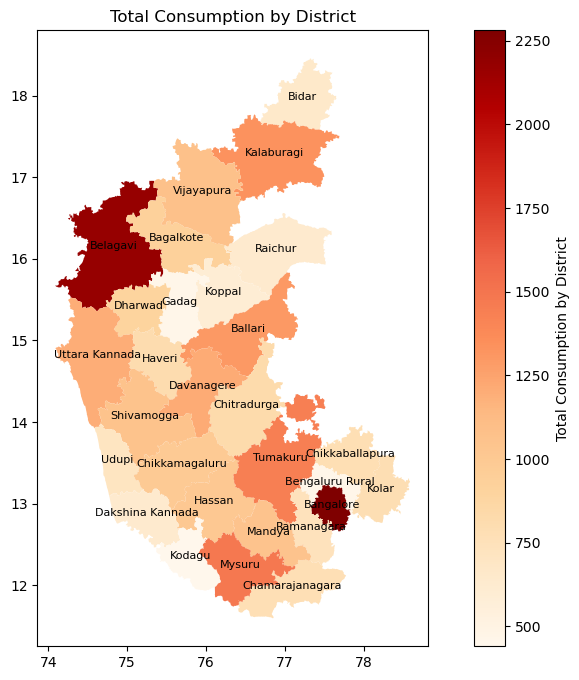

In [37]:
# Plot with labeled district names
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data_map_data.plot(column='total_consumption', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Total Consumption by District"})
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title('Total Consumption by District')
plt.show()
